# NETFLIX Case Study

### This case study is to analyse the Movies and TV shows on Netfilx.
### Insights from the data ananlysis and the recomendations could help Netflix in deciding which type of shows/movies to release on the OTT platform and how they can grow the business in different countries

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

#### Bar plot formate

In [2]:
def show_values_on_bars(axs, h_v="v", space=1):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")
                
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

#### Reading file and preparing window

In [3]:
# reading data and getting pd window ready
df = pd.read_csv('Nextflix.csv')
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_row', 4000)

## Getting starter information

In [4]:
# getting starter information
"""
* data shape
* data info
* data head
* data tail
* missing values
* data description
* check duplicates
* drop duplicates
* drop unnecessary columns
"""
cs_name = 'Netflix case study'
print(f'{cs_name}, shape is {df.shape}')
print()
print()
print(f"{cs_name} basic information")
print()
print(df.info())
print()
print()
print(f"{cs_name} Null value count percentage:")
print()
print(df.isnull().sum(axis=0)/len(df)*100)
print()
print()
print(f"{cs_name} Description:")
print()
print(df.describe())
print()
print()
print(f"{cs_name} Deep Description:")
print()
print(df.describe(include='object').T)
print()
print()
print(f"{cs_name} Duplicate values:")
print()
print()
print(f"{cs_name} Duplicate values:")
print()
print(df.loc[df.duplicated()])


Netflix case study, shape is (8807, 13)


Netflix case study basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    8807 non-null   int64 
 1   show_id       8807 non-null   object
 2   type          8807 non-null   object
 3   title         8807 non-null   object
 4   director      6173 non-null   object
 5   cast          7982 non-null   object
 6   country       7976 non-null   object
 7   date_added    8797 non-null   object
 8   release_year  8807 non-null   int64 
 9   rating        8803 non-null   object
 10  duration      8804 non-null   object
 11  listed_in     8807 non-null   object
 12  description   8807 non-null   object
dtypes: int64(2), object(11)
memory usage: 894.6+ KB
None


Netflix case study Null value count percentage:

Unnamed: 0       0.000000
show_id          0.000000
type             0.000

# Cleaning the data

### Dropping unnecessary columns

In [5]:
# dropping unnecessary columns
df.drop("description", axis=1, inplace=True)

### Filling NA with Unknow

In [6]:
# fill na with unknow

df["director"].fillna(value="Unknown", inplace=True)
df["cast"].fillna(value="Unknown", inplace=True)
df["country"].fillna(value="Unknown",inplace=True)

### Datetime formate change in date columns

In [7]:
# datetime formate change in date columns
df['date_added'] = pd.DatetimeIndex(df['date_added'])

# released year to int type
a = df['release_year'].to_list()
a = np.array(a, dtype= int)
df['release_year'] = a

# making new column year added
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

# making new column month added
df['month_added'] = pd.DatetimeIndex(df['date_added']).month

### Cleaning the cat column

In [8]:
# cleaning the cast column
bulk_cast = df['cast'].apply(lambda x: str(x).split(", ")).to_list()
new_df_cast = pd.DataFrame(bulk_cast, index=df['title'])
new_df_cast = new_df_cast.stack()
new_df_cast = pd.DataFrame(new_df_cast)
new_df_cast.reset_index(inplace=True)
new_df_cast = new_df_cast[['title', 0]]
new_df_cast.columns = ['title', 'actors']

### cleaning listed_in column

In [9]:
# cleaning list_in
bulk_list_in = df['listed_in'].apply(lambda x: str(x).split(", ")).to_list()
new_df_listed_in = pd.DataFrame(bulk_list_in, index=df['title'])
new_df_listed_in = new_df_listed_in.stack()
new_df_listed_in = pd.DataFrame(new_df_listed_in)
new_df_listed_in.reset_index(inplace=True)
new_df_listed_in = new_df_listed_in[['title', 0]]
new_df_listed_in.columns = ['title', 'genre']

### Cleaning directors

In [10]:
# cleaning directors
bulk_directors = df['director'].apply(lambda x: str(x).split(", ")).to_list()
new_df_directors = pd.DataFrame(bulk_directors, index=df['title'])
new_df_directors = new_df_directors.stack()
new_df_directors = pd.DataFrame(new_df_directors)
new_df_directors.reset_index(inplace=True)
new_df_directors = new_df_directors[['title', 0]]
new_df_directors.columns = ['title', 'directors']

### Cleaning Country

In [11]:
# cleaning country
bulk_countries = df['country'].apply(lambda x: str(x).split(", ")).to_list()
new_df_country = pd.DataFrame(bulk_countries, index=df['title'])
new_df_country = new_df_country.stack()
new_df_country = pd.DataFrame(new_df_country)
new_df_country.reset_index(inplace=True)
new_df_country = new_df_country[['title', 0]]
new_df_country.columns = ['title', 'countries']

### Joing the new DataFrames

In [12]:
#joining new DFs
merged_one = new_df_cast.merge(new_df_directors, on='title')
merged_two = new_df_country.merge(new_df_listed_in, on="title")
merged_df = merged_one.merge(merged_two, on='title')
df = df.merge(merged_df, on='title')

### Dropping old unnecessary columns

In [13]:
# dropping old unnecessary columns
drop_list = ['Unnamed: 0','show_id','director','listed_in']
df.drop(drop_list, axis=1, inplace = True)
df.drop('cast',axis=1,inplace=True)
df.drop('country',axis=1,inplace=True)

### Making movie duration and tv show duration colums with int type

In [14]:
# making movie duration and tv show duration colums with int type

df['movie_duration'] = df[df['type'] == "Movie"]['duration'].str.replace(' min',"")
movie_duration_in_list = df['movie_duration'].to_list()
movie_duration_in_list = np.array(movie_duration_in_list, dtype='float')
movie_duration_in_list

df['movie_duration'] = movie_duration_in_list


df['TV_Show_duration'] = df[df['type'] == "TV Show"]['duration'].str.replace(' Seasons',"")
df['TV_Show_duration'] = df['TV_Show_duration'].str.replace(' Season',"")
df['TV_Show_duration'].astype("float")
df.drop('duration', axis=1, inplace=True)

### New column content for

In [15]:
# new column content for
df["content_for"] = df["rating"].replace({"TV-MA":"Adults",
                     "TV-14" : "Teens",
                     "TV-PG" : "Older Kids",
                      "R":"Adults",
                      "PG-13":"Teens",
                      "TV-Y7":"Older Kids",
                      "TV-Y":"Kids",
                      "PG":"Older Kids",
                      "TV-G":"Kids",
                      "NR":"Adults",
                      "G":"Kids",
                      "TV-Y7-FV":"Older Kids",
                      "NC-17":"Adults",
                      "UR":"Adults"
                     })

# Analysing the data

### Movie and TV shows distribution in the data

In [16]:
# movie and tv shows distribution in the data
type_distribution = df["type"].value_counts(normalize=True)*100
print(type_distribution)


Movie      72.202722
TV Show    27.797278
Name: type, dtype: float64


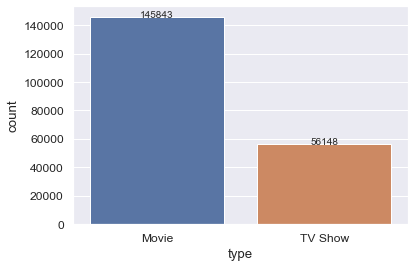

In [17]:
# movie and tv shows distribution in the data plot

sns.set(font_scale = 1.1)
types = sns.countplot(data = df , x = "type")
 
show_values_on_bars(types,h_v="v",space=1)

### Distribution on the bases of rating, and the countplot graph

In [18]:
# content distribtion on rating bases
rating_base_distribution = df['rating'].value_counts()
print(rating_base_distribution)
print('________________________________________________________________________________________________________________')
rating_base_distribution_percentage = (df['rating'].value_counts(normalize=True)*100).head(14)
print(rating_base_distribution_percentage)
print('________________________________________________________________________________________________________________')

TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64
________________________________________________________________________________________________________________
TV-MA       36.581585
TV-14       21.756205
R           12.806799
PG-13        8.045601
TV-PG        7.391890
PG           5.407480
TV-Y7        3.121967
TV-Y         1.815039
TV-G         1.376260
NR           0.779006
G            0.757711
NC-17        0.073790
TV-Y7-FV     0.042590
UR           0.042590
Name: rating, dtype: float64
________________________________________________________________________________________________________________


In [19]:
#Observation:
#TV-MA and TV-14 covers more the 50% of the content rating

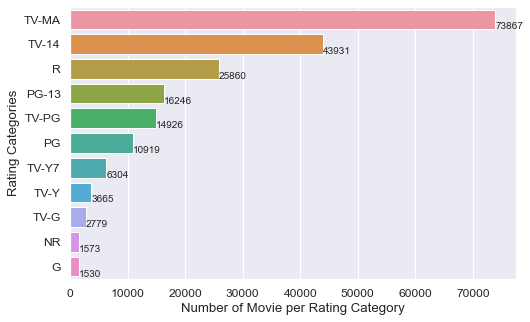

In [20]:
plt.figure(figsize=(8,5))
show_values_on_bars(sns.barplot( x = df["rating"].value_counts().head(11), y = df["rating"].value_counts().head(11).index),h_v="h")
plt.xlabel("Number of Movie per Rating Category")
plt.ylabel("Rating Categories")
plt.show()


### Distribution on the bases of age groups, and the countplot graph


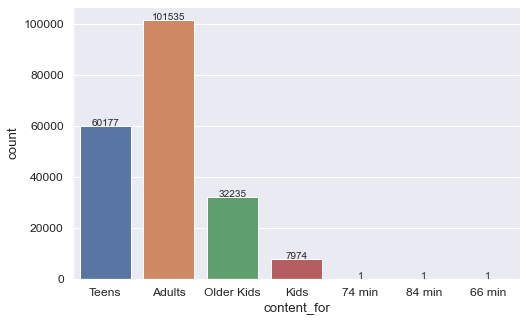

In [21]:
age_base_distribution = df["content_for"].value_counts()
age_base_distribution
age_base_distribution_in_percent = df["content_for"].value_counts(normalize=True)*100
age_base_distribution_in_percent


plt.figure(figsize=(8,5))
show_values_on_bars(sns.countplot(x = df["content_for"]))


In [22]:
# observation:
# movies and tv shows on Netflix are mostly for adults and teen.

### Movies and Tv shows per year

In [23]:
# movies_ans_tvshows_per_year

movies_ans_tvshows_per_year = df.groupby('release_year')['title'].count().sort_values(ascending=True).reset_index()
movies_ans_tvshows_per_year.head()

,release_year,title
0,1925,1
1,1943,5
2,1942,6
3,1946,6
4,1947,8


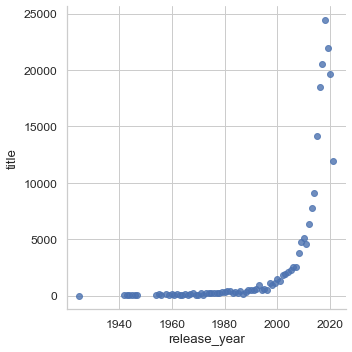

In [24]:
# movies_ans_tvshows_per_year plot

sns.set_style('whitegrid')
sns.lmplot(x='release_year', y='title', data=movies_ans_tvshows_per_year,fit_reg=False, )
plt.show()

### Number of movies and tv shows per year for last 30 year 

In [25]:
# number of movies and tv shows per year for last 30 year 

in_last_30_year_movies_per_year = movies_ans_tvshows_per_year.tail(30)
in_last_30_year_movies_per_year.head()

,release_year,title
44,1996,532
45,1991,533
46,1992,542
47,1995,582
48,1993,893


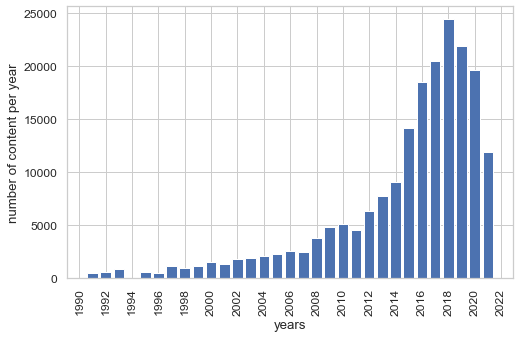

In [26]:
# number of movies and tv shows per year for last 30 year plot
plt.figure(figsize=(8,5))
plt.bar(in_last_30_year_movies_per_year['release_year'],in_last_30_year_movies_per_year['title'])
plt.xlabel('years')
plt.ylabel('number of content per year')
plt.xticks(np.arange(1990,2023,2), rotation=90)
plt.show()

### Analyzing TV shows and Movies data seperately 

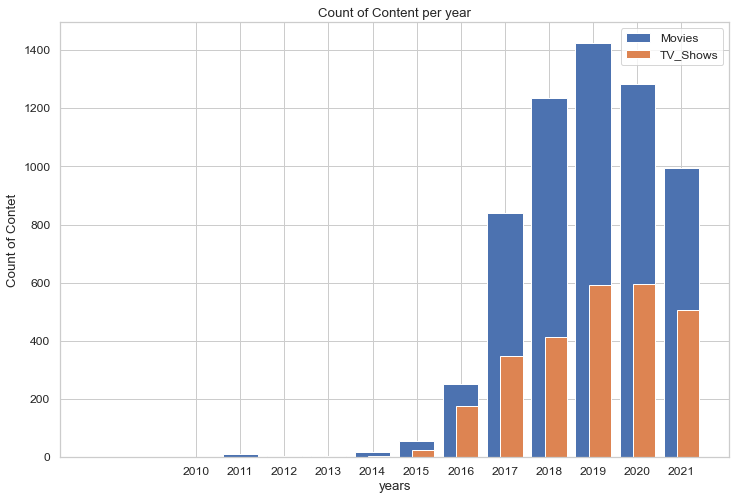

In [27]:
TV_shows = df.loc[df["type"]=="TV Show"]
Movies = df.loc[df["type"]=="Movie"]

plt.figure(figsize=(12,8))
plt.bar(Movies.groupby("year_added")["title"].nunique().index,Movies.groupby("year_added")["title"].nunique() )
plt.bar((TV_shows.groupby("year_added")["title"].nunique().index)+0.15,TV_shows.groupby("year_added")["title"].nunique(),
 width=0.5 )
plt.xticks(np.arange(2010,2022),rotation = 0)
plt.title("Count of Content per year")
plt.xlabel("years")
plt.ylabel("Count of Contet")
plt.legend(["Movies","TV_Shows"])
plt.show()

### Best director, number of movies

In [28]:
# best director, number of movies
top_10_directors_global = df.groupby('directors')['title'].count().sort_values(ascending=False).head(11).reset_index()
top_10_directors_global = top_10_directors_global.drop(0,axis=0)
top_10_directors_global

top_director_global = top_10_directors_global.head(1) 
top_director_global



,directors,title
1,Martin Scorsese,419


### Best actor, based on number of movies

In [29]:
# best actor, number of movies
top_10_actors_global = df.groupby('actors')['title'].count().sort_values(ascending=False).head(11).reset_index()
top_10_actors_global = top_10_actors_global.drop(0,axis=0)
top_10_actors_global
top_actors_global = top_10_actors_global.head(1)
top_actors_global

,actors,title
1,Liam Neeson,161


### Number of Content per country, and its plot

In [30]:
# number of movies per country

no_of_content_per_country = df.groupby("countries")["title"].nunique().sort_values(ascending=False).head(20).reset_index()
no_of_content_per_country.head()


,countries,title
0,United States,3689
1,India,1046
2,Unknown,831
3,United Kingdom,804
4,Canada,445


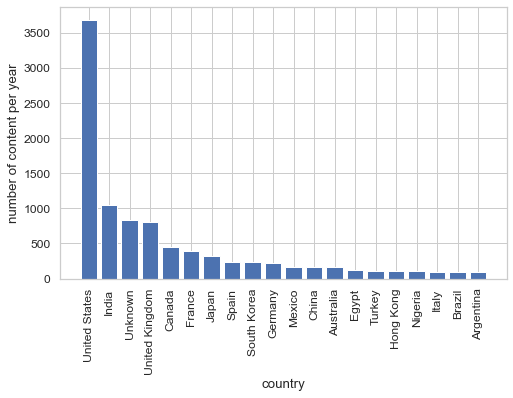

In [31]:
# # number of movies per country plot

plt.figure(figsize=(8,5))
plt.bar(no_of_content_per_country['countries'],no_of_content_per_country['title'])
plt.xlabel('country')
plt.ylabel('number of content per year')
plt.xticks(rotation=90)
plt.show()

### Top 20 countries with highest content

In [32]:
# top 20 countries
top_20_countries = no_of_content_per_country.head(20)
top_20_countries.head()

,countries,title
0,United States,3689
1,India,1046
2,Unknown,831
3,United Kingdom,804
4,Canada,445


### Movies Counts - TV Shows Count as per Top Countires:

In [33]:
tvcount = TV_shows.groupby("countries")["title"].nunique().sort_values(ascending=False).reset_index()

mcount = Movies.groupby("countries")["title"].nunique().sort_values(ascending=False).reset_index()

tvVSMovies_per_country = tvcount.merge(mcount,on="countries",how = "outer")

tvVSMovies_per_country.rename({"title_x":"TV Shows Count", "title_y":"Movies Counts"},axis = 1,inplace=True)

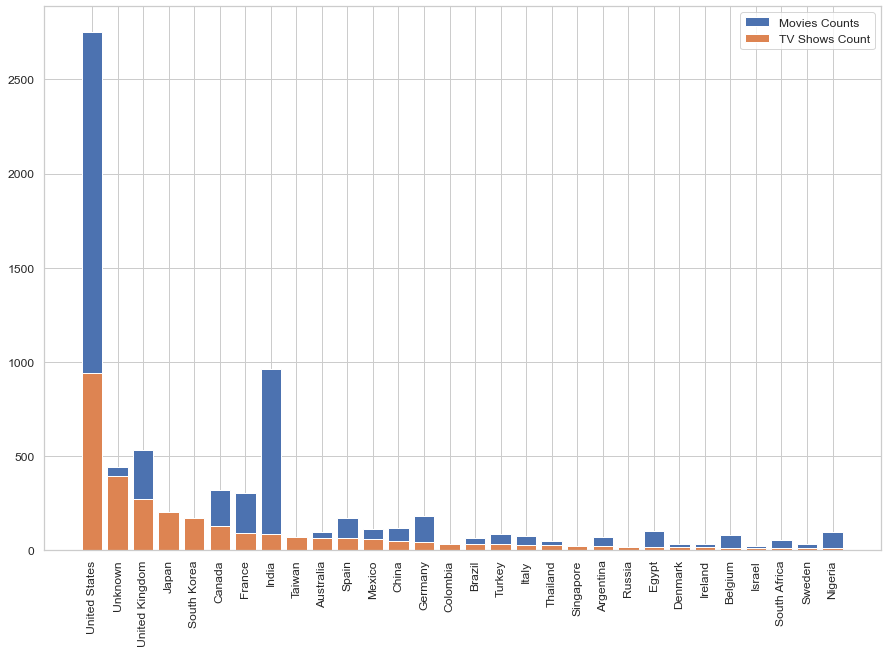

In [34]:
plt.figure(figsize=(15,10))
plt.bar(tvVSMovies_per_country["countries"].head(30),tvVSMovies_per_country["Movies Counts"].head(30))
plt.bar(tvVSMovies_per_country["countries"].head(30),tvVSMovies_per_country["TV Shows Count"].head(30))
plt.xticks(rotation = 90)
plt.legend(["Movies Counts","TV Shows Count"])
plt.show()

### Most popular genre

In [35]:
# most popular genre top 10
top_genre = df.groupby('genre')['title'].nunique().sort_values(ascending = False).head(10).reset_index()
top_genre


,genre,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


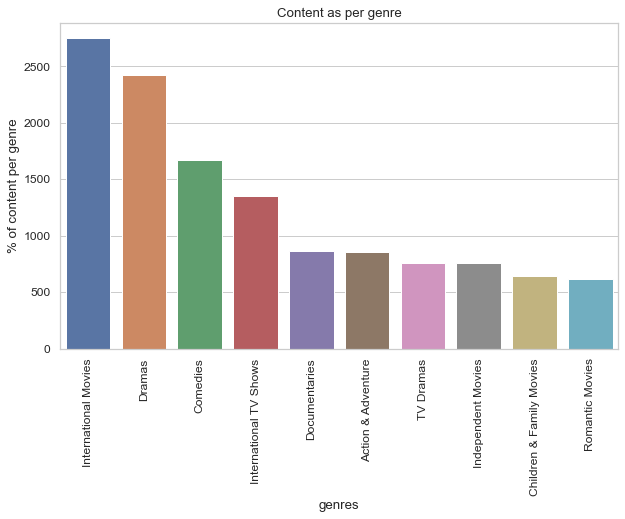

In [36]:
# most popular genre top 10 polt

plt.figure(figsize=(10,6))
sns.barplot(x = "genre" , y="title" , data = top_genre )
plt.title("Content as per genre")
plt.xlabel("genres")
plt.ylabel("% of content per genre")
plt.xticks(rotation = 90)
plt.show()


### Top 20 actors who have worked in more then one country

In [37]:
# top 20 actors who have worked in more the counties

top_20_actors_working_in_muliple_country = df.groupby('actors')['countries'].nunique().sort_values(ascending=False).head(21).reset_index()
top_20_actors_working_in_muliple_country = top_20_actors_working_in_muliple_country.drop(0,axis=0)
top_20_actors_working_in_muliple_country.head(20)

,actors,countries
1,Alfred Molina,14
2,Paul Giamatti,14
3,Mads Mikkelsen,13
4,Ben Whishaw,13
5,James Franco,13
6,Eddie Marsan,13
7,Vincent Tong,13
8,Sylvester Stallone,13
9,John Cleese,13
10,Nicole Kidman,13


### Top 20 directors who have worked in more then one country

In [38]:
# top 20 directors who have worked in more the counties

top_20_directors_working_in_muliple_country = df.groupby('directors')['countries'].nunique().sort_values(ascending=False).head(21).reset_index()
top_20_directors_working_in_muliple_country = top_20_directors_working_in_muliple_country.drop(0,axis=0)
top_20_directors_working_in_muliple_country.head(20)

,directors,countries
1,Matthew Salleh,12
2,Joshua Oppenheimer,10
3,Farhad Safinia,8
4,Martin Campbell,8
5,James Watkins,7
6,Aaron Woodley,7
7,Renny Harlin,7
8,Nora Twomey,7
9,Brian De Palma,7
10,Olivier Assayas,7


### Top actors in popular genres

In [39]:
# for each genre top actor


most_popular_genre = top_genre[0:11]


for genre in most_popular_genre['genre']:
    print()
    print(genre)
    print("Actor               number of movies")
    name = (df[df['genre']== genre].groupby('actors')['title'].nunique().sort_values(ascending=False).head(2))
    print(name)


International Movies
Actor               number of movies
actors
Unknown        178
Anupam Kher     38
Name: title, dtype: int64

Dramas
Actor               number of movies
actors
Anupam Kher       28
Shah Rukh Khan    28
Name: title, dtype: int64

Comedies
Actor               number of movies
actors
Anupam Kher     20
Paresh Rawal    18
Name: title, dtype: int64

International TV Shows
Actor               number of movies
actors
Unknown             109
Takahiro Sakurai     22
Name: title, dtype: int64

Documentaries
Actor               number of movies
actors
Unknown        424
Samuel West     10
Name: title, dtype: int64

Action & Adventure
Actor               number of movies
actors
Bruce Willis        13
Amitabh Bachchan    12
Name: title, dtype: int64

TV Dramas
Actor               number of movies
actors
Tay Ping Hui    10
Jeanette Aw      7
Name: title, dtype: int64

Independent Movies
Actor               number of movies
actors
Naseeruddin Shah    10
Rajit Kapoor         8
Na

### Top Directors in popular genres

In [40]:
# for each genre top director

for genre in most_popular_genre['genre']:
    print()
    print(genre)
    print("Director               number of movies")
    name = (df[df['genre']== genre].groupby('directors')['title'].nunique().sort_values(ascending=False).head(2))
    print(name)


International Movies
Director               number of movies
directors
Unknown                47
Cathy Garcia-Molina    13
Name: title, dtype: int64

Dramas
Director               number of movies
directors
Unknown            25
Youssef Chahine    12
Name: title, dtype: int64

Comedies
Director               number of movies
directors
Unknown         32
David Dhawan     9
Name: title, dtype: int64

International TV Shows
Director               number of movies
directors
Unknown                1223
Alastair Fothergill       3
Name: title, dtype: int64

Documentaries
Director               number of movies
directors
Unknown       57
Vlad Yudin     6
Name: title, dtype: int64

Action & Adventure
Director               number of movies
directors
Don Michael Paul    9
Unknown             8
Name: title, dtype: int64

TV Dramas
Director               number of movies
directors
Unknown             702
Abhishek Chaubey      1
Name: title, dtype: int64

Independent Movies
Director              

#### movie duration from shortest to longest

In [41]:
movie_dur = df.groupby("movie_duration")['title'].unique().reset_index()
movie_dur.head()


,movie_duration,title
0,3.0,[Silent]
1,5.0,[Sol Levante]
2,8.0,[Cops and Robbers]
3,9.0,[Canvas]
4,10.0,[American Factory: A Conversation with the Oba...


### Top 20 Versatile Actors

In [42]:
df.groupby("actors")["genre","title"].aggregate({
 "genre":"nunique",
 "title":"nunique"
}).sort_values(by = ["genre","title"],ascending=[False,False]).head(20)[1:]

,genre,title
actors,,
Ron Perlman,17,13
Gary Cole,16,11
Kiernan Shipka,16,9
Glenn Close,15,12
Anupam Kher,14,43
Samuel L. Jackson,14,24
Rajesh Sharma,14,18
Antonio Banderas,14,15
Ben Kingsley,14,15


### Top 20 versatile Directors

In [43]:
df.groupby("directors")["genre","title"].aggregate({
 "genre":"nunique",
 "title":"nunique"
}).sort_values(by = ["genre","title"],ascending=[False,False]).head(20)[1:]

,genre,title
directors,,
Martin Scorsese,9,12
Anurag Kashyap,9,9
Priyadarshan,8,7
Abhishek Chaubey,8,5
Vishal Bhardwaj,8,5
Vikramaditya Motwane,8,4
Ifa Isfansyah,8,3
David Dhawan,7,9
Clint Eastwood,7,7


### Shortest movie on Netflix (in min)

In [44]:
# Shortest movie on Netflix

shortest_movie = min(movie_dur['movie_duration'])
shortest_movie = movie_dur[movie_dur['movie_duration'] == shortest_movie]
shortest_movie

,movie_duration,title
0,3.0,[Silent]


### longest movie on Netflix (in min)

In [45]:
#longest movie on Netflix 
longest_movie = max(movie_dur['movie_duration'])
longest_movie = movie_dur[movie_dur['movie_duration'] == longest_movie]
longest_movie

,movie_duration,title
204,312.0,[Black Mirror: Bandersnatch]


### Movie duration density and graph

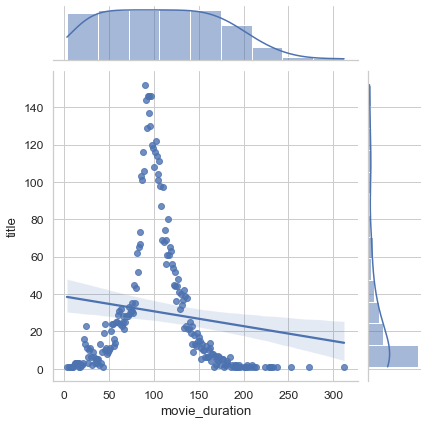

In [46]:
movie_duration_density =  df.groupby("movie_duration")['title'].nunique().reset_index()
movie_duration_density


sns.jointplot(x='movie_duration', y='title', data=movie_duration_density, kind="reg")
plt.show()

### Most popular movie duration

In [47]:
most_popular_movie_length = movie_duration_density[movie_duration_density['title'] ==max(movie_duration_density['title'])]
most_popular_movie_length

,movie_duration,title
84,90.0,152


### Best time to launch a content 

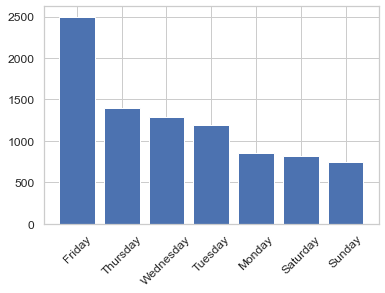

In [48]:
plt.bar(df.groupby(df["date_added"].dt.day_name())["title"].nunique().sort_values(ascending=False).index,
 df.groupby(df["date_added"].dt.day_name())["title"].nunique().sort_values(ascending=False))
plt.xticks(rotation = 45)
plt.show()


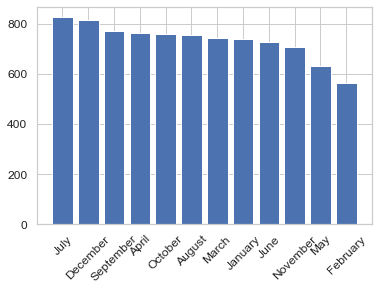

In [49]:
plt.bar(df.groupby(df["date_added"].dt.month_name())["title"].nunique().sort_values(ascending=False).index,
 df.groupby(df["date_added"].dt.month_name())["title"].nunique().sort_values(ascending=False))
plt.xticks(rotation = 45)
plt.show()


### Top actors in India

In [50]:
# top actors in India

top_10_actors_India = df.groupby(['countries','actors'])['title'].count().reset_index()
top_10_actors_India[top_10_actors_India['countries'] == 'India'].sort_values('title', ascending=False).head(10)

,countries,actors,title
14233,India,Anupam Kher,113
16873,India,Shah Rukh Khan,98
17460,India,Unknown,97
15879,India,Naseeruddin Shah,95
14001,India,Akshay Kumar,87
16297,India,Radhika Apte,86
16079,India,Paresh Rawal,85
14073,India,Amitabh Bachchan,85
16029,India,Om Puri,79
15324,India,Kareena Kapoor,76


### Top directors in India

In [51]:
# top actors in India

top_10_directors_India = df.groupby(['countries','directors'])['title'].count().reset_index()
top_10_directors_India[top_10_directors_India['countries'] == 'India'].sort_values('title', ascending=False).head(10)

,countries,directors,title
2335,India,Unknown,995
1802,India,David Dhawan,270
1731,India,Anurag Kashyap,219
1819,India,Dibakar Banerjee,192
2268,India,Sooraj R. Barjatya,180
2386,India,Zoya Akhtar,168
2333,India,Umesh Mehra,162
2129,India,Ram Gopal Varma,158
2078,India,Priyadarshan,156
1906,India,Karan Johar,155


### genre wise distribution in India

In [52]:
# genre wise distribution in India
genre_wise_dis_in_india = df.groupby(['countries','genre'])['title'].count().reset_index()
genre_wise_dis_in_india= genre_wise_dis_in_india[genre_wise_dis_in_india
                                                 ['countries'] == "India"].sort_values('title',ascending = False)
genre_wise_dis_in_india

,countries,genre,title
526,India,International Movies,7059
522,India,Dramas,5569
517,India,Comedies,2685
525,India,Independent Movies,1394
513,India,Action & Adventure,1187
532,India,Romantic Movies,931
530,India,Music & Musicals,847
547,India,Thrillers,743
527,India,International TV Shows,428
524,India,Horror Movies,307


### Top 10 genre in India

In [53]:
top_10_genre_india =  genre_wise_dis_in_india.head(10)
top_10_genre_india

,countries,genre,title
526,India,International Movies,7059
522,India,Dramas,5569
517,India,Comedies,2685
525,India,Independent Movies,1394
513,India,Action & Adventure,1187
532,India,Romantic Movies,931
530,India,Music & Musicals,847
547,India,Thrillers,743
527,India,International TV Shows,428
524,India,Horror Movies,307


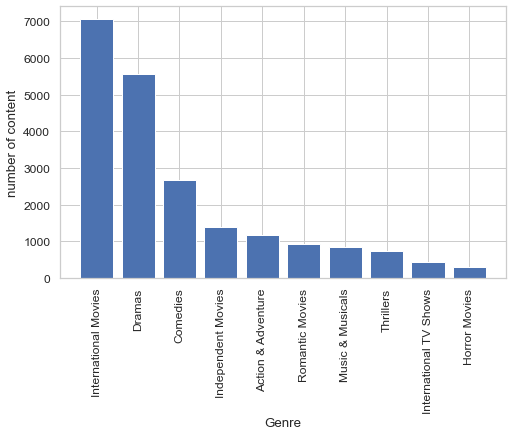

In [54]:
# most popular genre in india top 10 polt

plt.figure(figsize=(8,5))
plt.bar(top_10_genre_india['genre'],top_10_genre_india['title'])
plt.xlabel('Genre')
plt.ylabel('number of content')
plt.xticks(rotation=90)
plt.show()

In [55]:
df.head()

,type,title,date_added,release_year,rating,year_added,month_added,actors,directors,countries,genre,movie_duration,TV_Show_duration,content_for
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,2021.0,9.0,Unknown,Kirsten Johnson,United States,Documentaries,90.0,NaN,Teens
1,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2021.0,9.0,Ama Qamata,Unknown,South Africa,International TV Shows,NaN,2,Adults
2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2021.0,9.0,Ama Qamata,Unknown,South Africa,TV Dramas,NaN,2,Adults
3,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2021.0,9.0,Ama Qamata,Unknown,South Africa,TV Mysteries,NaN,2,Adults
4,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2021.0,9.0,Khosi Ngema,Unknown,South Africa,International TV Shows,NaN,2,Adults
